In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

## 1. Sequential

In [15]:
x_train = tf.random.normal(shape=(1000,) , dtype=tf.float32)
y_train = 3*x_train + 1 + 0.2*tf.random.normal(shape=(1000,), dtype=tf.float32)

print(x_train.dtype, y_train.dtype)

<dtype: 'float32'> <dtype: 'float32'>


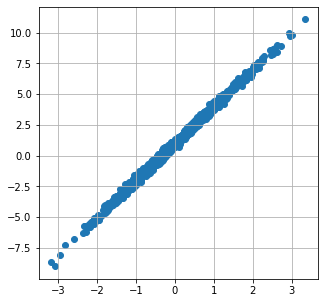

In [16]:
fig,ax = plt.subplots(figsize=(5, 5))
ax.scatter(x_train.numpy(), y_train.numpy())
ax.tick_params(labelsize=10)
ax.grid()

In [17]:
x_test = tf.random.normal(shape=(300,), dtype=tf.float32)
y_test = 3*x_test + 1 + 0.2*tf.random.normal(shape=(300,), dtype=tf.float32)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, activation='linear')
])

# Model 학습에 필요한 Loss와 Optimizer를 지정
model.compile(loss='mean_squared_error',
              optimizer='SGD')

In [20]:
model.fit(x_train, y_train, epochs=50, verbose=2)

Epoch 1/50
32/32 - 0s - loss: 0.0391
Epoch 2/50
32/32 - 0s - loss: 0.0392
Epoch 3/50
32/32 - 0s - loss: 0.0392
Epoch 4/50
32/32 - 0s - loss: 0.0392
Epoch 5/50
32/32 - 0s - loss: 0.0391
Epoch 6/50
32/32 - 0s - loss: 0.0392
Epoch 7/50
32/32 - 0s - loss: 0.0392
Epoch 8/50
32/32 - 0s - loss: 0.0392
Epoch 9/50
32/32 - 0s - loss: 0.0392
Epoch 10/50
32/32 - 0s - loss: 0.0392
Epoch 11/50
32/32 - 0s - loss: 0.0391
Epoch 12/50
32/32 - 0s - loss: 0.0392
Epoch 13/50
32/32 - 0s - loss: 0.0392
Epoch 14/50
32/32 - 0s - loss: 0.0392
Epoch 15/50
32/32 - 0s - loss: 0.0392
Epoch 16/50
32/32 - 0s - loss: 0.0391
Epoch 17/50
32/32 - 0s - loss: 0.0392
Epoch 18/50
32/32 - 0s - loss: 0.0392
Epoch 19/50
32/32 - 0s - loss: 0.0392
Epoch 20/50
32/32 - 0s - loss: 0.0392
Epoch 21/50
32/32 - 0s - loss: 0.0392
Epoch 22/50
32/32 - 0s - loss: 0.0392
Epoch 23/50
32/32 - 0s - loss: 0.0392
Epoch 24/50
32/32 - 0s - loss: 0.0391
Epoch 25/50
32/32 - 0s - loss: 0.0392
Epoch 26/50
32/32 - 0s - loss: 0.0392
Epoch 27/50
32/32 - 0

In [21]:
model.evaluate(x_test, y_test, verbose=2)

10/10 - 0s - loss: 0.0461


0.046090371906757355

## 2. Model Subclassing

: Sequential하게 진행되지 않는 모델을 정의할 수 있음

In [33]:
x_train = tf.random.normal(shape=(10,) , dtype=tf.float32)
y_train = 3*x_train + 1 + 0.2*tf.random.normal(shape=(10,), dtype=tf.float32)

x_test = tf.random.normal(shape=(3,), dtype=tf.float32)
y_test = 3*x_test + 1 + 0.2*tf.random.normal(shape=(3,), dtype=tf.float32)

In [34]:
class LinearPredictor(tf.keras.Model):
    # 생성자, 어떤 layer들을 사용할지를 정의
    def __init__(self):
        super(LinearPredictor, self).__init__()

        self.d1 = tf.keras.layers.Dense(units=1, activation='linear')

    # 어떻게 forward() 과정이 이루어질지 정의
    def call(self, x):
        x = self.d1(x)
        return x


In [35]:
EPOCHS = 10
LR = 0.01

In [43]:
# instantiation learning objects
model = LinearPredictor()

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD()

In [44]:
from termcolor import colored

# learning
for epoch in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.reshape(x, (1, 1))
        with tf.GradientTape() as tape:
            predictions = model(x)  # LinearPredictor.call()을 호출
            loss = loss_object(y, predictions)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    print(colored('Epoch: ', 'red', 'on_white'), epoch+1)

    template = 'Train loss:{:.4f}\n'
    print(template.format(loss))

Epoch:  1
Train loss:1.0521

Epoch:  2
Train loss:0.2769

Epoch:  3
Train loss:0.0518

Epoch:  4
Train loss:0.0027

Epoch:  5
Train loss:0.0025

Epoch:  6
Train loss:0.0112

Epoch:  7
Train loss:0.0183

Epoch:  8
Train loss:0.0221

Epoch:  9
Train loss:0.0233

Epoch:  10
Train loss:0.0230

